# Doctor's Consultation Fees Prediction

Problem Statement:

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

# FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Importing Requried Library

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
##Loading the Train dataset
df_train = pd.read_excel('Final_Train.xlsx')
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [33]:
## Loading the test dataset
df_test = pd.read_excel('Final_Test.xlsx')
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [34]:
## Checking the shape of train dataset
print('Shape of train dataset',df_train.shape)

##Checking shape of test Dataset
print('shape of test dataset',df_test.shape)

Shape of train dataset (5961, 7)
shape of test dataset (1987, 6)


We could see our train dataset has 5961 rows and 7 attributes including Our target Attribute.

Fees is our target attribute which we need to predict with the help of test dataset which has 1987 rows and 6 columns.

This is a Regression supervised problem

In [35]:
## Checking data Types
print('Training Dataset \n',df_train.dtypes)
print('\n')
print('Test Dataset \n',df_test.dtypes)

Training Dataset 
 Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object


Test Dataset 
 Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object


We have all 6 attributes of Object data type and our Target attribute is numeric.

All attribute's data type is ok.

In [36]:
#Checking Missing values
print('Missing values in Train Dataset \n',df_train.isnull().sum())
print('\n')
print('Missing values in Test dataset \n',df_test.isnull().sum())

Missing values in Train Dataset 
 Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


Missing values in Test dataset 
 Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


In [37]:
#Replacing the null values with the mode of the respective column.

# Train data
df_train.Rating = df_train.Rating.fillna('Unknown')
df_train.Place = df_train.Place.fillna('Unknown')

# Test data
df_test.Rating = df_train.Rating.fillna('Unknown')
df_test.Place = df_train.Place.fillna('Unknown')

In [38]:
# Dropping the Miscellaneous_Info because the info. in this column does not effect the consulatation fees of the doctor.

df_train.drop(['Miscellaneous_Info'], axis=1, inplace = True)
df_test.drop(['Miscellaneous_Info'], axis=1, inplace = True)

<AxesSubplot:>

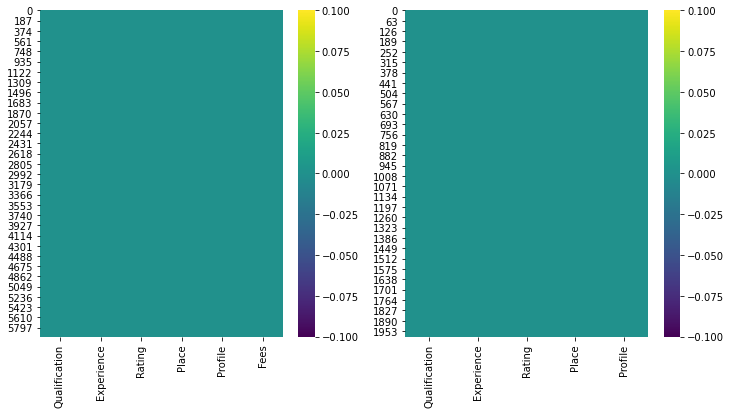

In [39]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.heatmap(df_train.isnull(), cmap = 'viridis')

plt.subplot(1,2,2)
sns.heatmap(df_test.isnull(), cmap = 'viridis')

We have sucessfully fillup the missing values.

In [40]:
# Let's check the string data from the train dataset.

df_obj = df_train.select_dtypes(include='object')
df_obj.head()

,Qualification,Experience,Rating,Place,Profile
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda
2,"MBBS, MS - Otorhinolaryngology",9 years experience,Unknown,"Mathikere - BEL, Bangalore",ENT Specialist
3,"BSc - Zoology, BAMS",12 years experience,Unknown,"Bannerghatta Road, Bangalore",Ayurveda
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda


In [41]:
# Let's check  the value counts of each categorical feature.

for i in df_obj.columns:
    x = df_obj[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Qualification --------
 BDS                                                                                                            488
BHMS                                                                                                           477
BAMS                                                                                                           471
MBBS                                                                                                           334
MBBS, MS - ENT                                                                                                 220
                                                                                                              ... 
MBBS, DVD, MRCGP                                                                                                 1
MBBS, Postgraduate Diploma Clinical Cardiology (PGDCC), Fellowship in Non-Invasive Cardiology (FIC)              1
MBBS, MD - General Medicine, Fellowship in Diab

In [42]:
#Let's check  the value counts of test data.
df_test_obj =df_test.select_dtypes(include='object')
for i in df_test_obj.columns:
    x = df_test_obj[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Qualification --------
 BAMS                                                                          153
BHMS                                                                          150
BDS                                                                           144
MBBS                                                                          107
MBBS, MD - Dermatology                                                         64
                                                                             ... 
BSAM                                                                            1
BHMS, MD (HOM) - Paeditrics, Fellowship Course in Homoeopathic Dermatology      1
FICD                                                                            1
MBBS, MD - Dermatology , Venereology & Leprosy, DDV                             1
MBBS, MD - Alternate Medicine                                                   1
Name: Qualification, Length: 630, dtype: int64


-------- Experie

In [43]:
# Stripping off or removing the 'years experience' from the 'Experience' e.g. 6 votes stripped off to 6, for training and testing dataset.

df_train["Experience"]=df_train["Experience"].str.rstrip('years experience')
df_test["Experience"]=df_test["Experience"].str.rstrip('years experience')

In [44]:
# Stripping '%' from "Rating"
df_train["Rating"]=df_train["Rating"].str.rstrip('%')
df_test["Rating"]=df_test["Rating"].str.rstrip('%')


# splitting the Place into two diff columns, They are delimited by ','


# For train dataset.
df_train['Area']=df_train.Place.str.split(',').str[0]
df_train['City']=df_train.Place.str.split(',').str[1]

# For test dataset.
df_test['Area']=df_test.Place.str.split(',').str[0]
df_test['City']=df_test.Place.str.split(',').str[1]

In [45]:
# Let's check teh mode of City in train and test data.

print("Mode of City in train dataset :",df_train['City'].mode(), '\n')
print("Mode of City in test dataset :",df_test['City'].mode(), '\n')

Mode of City in train dataset : 0     Bangalore
dtype: object 

Mode of City in test dataset : 0     Delhi
dtype: object 



In [46]:
# Filling the NaN values in City

df_train['City'].fillna('Unknown', inplace= True)
df_test['City'].fillna('Unknown', inplace= True)

In [47]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,Unknown,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,Unknown,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai


Apart from fees column all the columns are of object datatype. We will not convert the experiance and Rating column into initegers also not treat the outliers and skewness as per domain knowledge the outliers are needed in this columns for the model training. We will keep it as a object datatype and convert it into Ordinal encoding.


In [48]:
# we will drop the place column as it is not needed anymore
df_train.drop('Place', axis = 1, inplace = True)

In [49]:
df_test.drop('Place', axis = 1, inplace = True)

In [50]:
df_obj = df_train.select_dtypes(include = 'object')
df_obj.head()

,Qualification,Experience,Rating,Profile,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,Unknown,ENT Specialist,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,Unknown,Ayurveda,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,Keelkattalai,Chennai


In [51]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df_obj.columns:
    df_train[i] = oe.fit_transform(df_train[i].values.reshape(-1,1))
for i in df_test.columns:
    df_test[i] = oe.fit_transform(df_test[i].values.reshape(-1,1))
                                   

In [52]:
df_train.head()

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,401.0,16.0,0.0,5.0,100,296.0,4.0
1,73.0,3.0,49.0,0.0,350,856.0,0.0
2,1135.0,63.0,51.0,3.0,300,452.0,0.0
3,464.0,3.0,51.0,0.0,250,68.0,0.0
4,10.0,12.0,0.0,0.0,250,335.0,1.0


In [53]:
df_test.head()

,Qualification,Experience,Rating,Profile,Area,City
0,241.0,28.0,0.0,4.0,210.0,4.0
1,340.0,24.0,40.0,3.0,588.0,0.0
2,258.0,34.0,42.0,2.0,310.0,0.0
3,6.0,0.0,42.0,0.0,53.0,0.0
4,79.0,7.0,0.0,1.0,237.0,1.0


In [54]:
# Let's check the shape of final train and test dataset.

print("Shape of Train data :", df_train.shape)
print("Shape of Test data :",df_test.shape)

Shape of Train data : (5961, 7)
Shape of Test data : (1987, 6)


In [55]:
# Let's check the data type of final train and test dataset.

print("-----FINAL TRAIN DATASET-----\n", df_train.dtypes,'\n')
print("-----FINAL TEST DATASET-----\n", df_test.dtypes)

-----FINAL TRAIN DATASET-----
 Qualification    float64
Experience       float64
Rating           float64
Profile          float64
Fees               int64
Area             float64
City             float64
dtype: object 

-----FINAL TEST DATASET-----
 Qualification    float64
Experience       float64
Rating           float64
Profile          float64
Area             float64
City             float64
dtype: object


# Separating the input and output variables

In [56]:
# Let's Separating the input and target variables

X = df_train.drop(columns=["Fees"])
y = df_train[["Fees"]]

In [57]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(5961, 6)
(5961, 1)


In [58]:
# Let's check the head of the input variables.
X.head()

,Qualification,Experience,Rating,Profile,Area,City
0,401.0,16.0,0.0,5.0,296.0,4.0
1,73.0,3.0,49.0,0.0,856.0,0.0
2,1135.0,63.0,51.0,3.0,452.0,0.0
3,464.0,3.0,51.0,0.0,68.0,0.0
4,10.0,12.0,0.0,0.0,335.0,1.0


In [59]:
# Let's check the head of the output variables.
y.head()

,Fees
0,100
1,350
2,300
3,250
4,250


# Standard Scaling

In [60]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
df_test = sc.transform(df_test)

In [61]:
X

array([[-4.73305738e-01, -3.34882629e-01, -2.61246491e+00,
         1.54301587e+00, -4.55043465e-01,  3.83286234e-01],
       [-1.26594438e+00, -9.55840219e-01,  3.79506009e-01,
        -1.47289258e+00,  1.73059827e+00, -1.31827343e+00],
       [ 1.30046489e+00,  1.91011789e+00,  5.01627271e-01,
         3.36652489e-01,  1.53813876e-01, -1.31827343e+00],
       ...,
       [-2.07239780e-03,  5.72670771e-01,  3.18445378e-01,
         9.39834180e-01, -7.71180931e-01, -4.21036824e-02],
       [ 8.36481290e-01, -8.12542314e-01, -1.08979039e-01,
         9.39834180e-01,  1.67205430e+00,  1.23406607e+00],
       [-8.55125573e-01, -7.17010377e-01, -2.61246491e+00,
        -8.69710893e-01,  7.19738968e-01, -4.21036824e-02]])

In [62]:
df_test

array([[-0.85995874,  0.23830899, -2.61246491,  0.93983418, -0.79069559,
         0.38328623],
       [-0.62071719,  0.04724512, -0.17003967,  0.33665249,  0.68461258,
        -1.31827343],
       [-0.81887685,  0.5249048 , -0.04791841, -0.2665292 , -0.40040242,
        -1.31827343],
       ...,
       [-0.29689531,  1.57575611, -2.61246491,  0.93983418, -1.52834968,
         1.23406607],
       [-1.31910917, -0.95584022, -1.0248885 , -0.86971089,  0.6377774 ,
         1.23406607],
       [-0.51438762,  1.52799014, -0.04791841, -0.2665292 , -1.58689365,
        -0.89288352]])

# Training And Testing the Models

In [63]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [64]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print ("Train acc",reg.score(X_train,y_train))
    print('\n')
    print("Mean Absolute Error : ",mean_absolute_error(y_test, pred))
    print('\n')
    print("Mean Squared Error : ",mean_squared_error(y_test, pred))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [65]:
# Creating the instances for the algorithms.

lr = LinearRegression()
lreg = Lasso(alpha=0.0001)
rg = Ridge(alpha=1)
sv = SVR()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()
XGB = XGBRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()

In [66]:
models = []
models.append(('LinearRegression', lr))
models.append(('Lasso', lreg))
models.append(('Ridge', rg))
models.append(('SVR', sv))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))
models.append(('XGBoostRegressor', XGB))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))

In [67]:

# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.1063874120792081 achieved at 44


Train acc 0.08982937174551942


Mean Absolute Error :  149.69367957364074


Mean Squared Error :  33710.94036981702


RMSE :  183.6053930847812


Cross validation score (Mean r2 score): 0.08148403430709841
Standard Deviationin r2 score : 0.004717655627120154




-------- Lasso --------
Maximum r2 score : 0.10638721928648287 achieved at 44


Train acc 0.0898293717440628


Mean Absolute Error :  149.69367403096473


Mean Squared Error :  33710.935735594765


RMSE :  183.6053804647205


Cross validation score (Mean r2 score): 0.0814840355070838
Standard Deviationin r2 score : 0.0047176343719199185




-------- Ridge --------
Maximum r2 score : 0.10638207600888883 achieved at 44


Train acc 0.08982936837541489


Mean Absolute Error :  149.6938377189976


Mean Squared Error :  33710.78047003621


RMSE :  183.6049576401362


Cross validation score (Mean r2 score): 0.08148468036354557
Standard Deviationi

Out of all model gradientboosting regressor shows the least difference between the r2_score and cross val score. Thus we will further hperparameter tune the gradientboosting algorithm.

# HyperParameter Tuning

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)
param = {
"n_estimators":[5,50,250,500],
"max_depth":[1,3,5,7,9],
"learning_rate":[0.01,0.1,1,10,100]
}
GBC = GradientBoostingRegressor()
glf = GridSearchCV(GBC, param, scoring='r2', n_jobs=-1)
glf.fit(X_train, y_train)
print('Best score is {} for best parameters {}'.format(glf.best_score_, glf.best_params_))

Best score is 0.205512357589459 for best parameters {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


Here we can see that by hyper parameter tuning the accuracy further drops hence we will use the defaul parameters.

In [70]:
GBC = GradientBoostingRegressor()
max_r2_score(GBC, X,y)

Maximum r2 score : 0.24367158824269608 achieved at 63


Train acc 0.2835998100184952


Mean Absolute Error :  138.1142751597444


Mean Squared Error :  30256.072883906716


RMSE :  173.94272874686862


# Model Saving

In [71]:
import joblib
joblib.dump(GBC, 'DoctorsConsultationFeesGBC.pkl')

['DoctorsConsultationFeesGBC.pkl']

In [72]:
model = joblib.load('DoctorsConsultationFeesGBC.pkl')
prediction = model.predict(df_test)
prediction

array([252.65109176, 382.29980551, 380.83527891, ..., 317.72240787,
       298.07666338, 315.8667315 ])